Bacha: pohlídat audioknihy.
Bacha 2: filtrovat posmrtně vydané knihy.

In [2]:
import os
import re
import statistics
import pandas as pd

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [4]:
df = pd.read_parquet(os.path.join('data/cnb_sloupce','008.parquet'))

In [5]:
sloupce = ['leader','245','080','655','072','100','041','964']

In [6]:
for s in sloupce:
    pripojit = pd.read_parquet(os.path.join("data/cnb_sloupce",f"{s}.parquet"))
    df = df.merge(pripojit, left_index=True, right_index=True, how="left")

In [7]:
df.sample(30)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ck9104417,910627s1991 xr a 000 1 cze,nam a22 a 4500,1,0,Divák v únorové noci /,None,Josef Škvorecký ; [koláže Miloš Holub],None,None,None,None,None,None,"[323.2, 885.0-32, 943.7]","[undef, undef, undef]",None,None,None,[7],[povídky],[fd133105],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Škvorecký, Josef,",jk01130413,[aut],1924-2012,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Československo - Únor 1948 - povídky - r. 1948]
ck8704101,871005s1987 xr a u0|0 | cze,nam a22 4500,1,0,Prvky řídících systémů /,None,"Slavomír Sůva, Jan Skočdopole, Pavel Novák",None,None,None,None,None,None,[681.5],[undef],None,None,None,[7],[učebnice vysokých škol],[fd133772],[czenas],None,None,None,None,NaN,NaN,NaN,NaN,NaN,1,"Sůva, Slavomír",jx20050504026,[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[systémy řídicí - prostředky automatizační - p...
ck8503824,851010s1981 xr u0|0 cze,nam a22 4500,0,4,The Theory of Teaching the Mother Tongue :,Selective Bibliography....,None,[1980],None,None,None,None,None,"[800.71, 019.922, 371.3.01]","[undef, undef, undef]",None,None,None,[7],[výběrové bibliografie],[fd186981],[czenas],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[jazyk mateřský - vyučování - bibliografie výb...
cpg20071746722,070807s2000 xr nnn g kncze,nkm a22 a 4500,1,0,Stratov,"pohled do obce, kaplička ... /",foto Petr Prášil,None,None,[grafika] :,None,None,None,"[(437.312), (089.7)]","[MRF, MRF]",None,None,None,[7],[místní pohlednice],[fd132898],[czenas],None,None,None,None,NaN,NaN,NaN,NaN,NaN,1,"Prášil, Petr,",jx20050830020,[pht],1971-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpk20051525176,050520s2004 xr e p 000 0 cze,nam a22 a 4500,1,0,Obchodní právo /,None,Ivana Pazderská,None,None,None,None,None,None,"[347.7, (075.8)]","[MRF, MRF]",None,None,None,"[7, 9]","[učebnice vysokých škol, textbooks (higher)]","[fd133772, None]","[czenas, eczenas]",None,None,None,None,"[7, 7]","[347.7, 37.016]",[Obchodní právo. Finanční právo. Právo průmysl...,"[Konspekt, Konspekt]","[16, 22]",1,"Pazderská, Ivana,",mzk2005273127,[aut],1963-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bk195401545,980222s1954 xr d p 00| 0 cze,nam a22 1 4500,0,0,Čítanka pro desátý postupný ročník škol všeobe...,None,Josef Brambora ... [et al.] ; upr. Ludvík Pále...,None,None,None,None,None,None,"[82:37.016, (075.3), (075)028]","[MRF, MRF, MRF]",None,None,None,"[7, 7]","[učebnice středních škol, čítanky]","[fd133771, fd133984]","[czenas, czenas]",None,None,None,None,"[7, 7]","[82, 37.016]","[Literatura. Literární život, Učební osnovy. V...","[Konspekt, Konspekt]","[11, 22]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpk20041317658,040630s2004 xr c f f 000 0 cze,nam a22 a 4500,1,0,Třicet let Mladé kamery :,Mladá kamera v letech 1975-2004,None,None,None,None,None,None,None,"[791.65.079, 791.2.077, 791.42-057.875, (437.3...","[MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 9]","[informační publikace, information publications]","[fd132454, None]","[czenas, eczenas]",None,None,None,None,[7],[791/793],"[Divadlo, film, tanec (obecně)]",[Konspekt],[3],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nkc20051626306,051010s2005 xr ab g p 000 0 cze,nam a22 a 4500,1,0,Němčina :,rychlokurz pro začátečníky : [učebnice] /,Angeli

In [8]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 1238228 entries, ck8300078 to nkc20243632953
Data columns (total 55 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   008       1238228 non-null  object
 1   leader    1238228 non-null  object
 2   245_ind1  1238217 non-null  object
 3   245_ind2  1238217 non-null  object
 4   245_a     1238228 non-null  object
 5   245_b     598792 non-null   object
 6   245_c     1022186 non-null  object
 7   245_n     76402 non-null    object
 8   245_p     58319 non-null    object
 9   245_h     149934 non-null   object
 10  245_f     18 non-null       object
 11  245_s     5 non-null        object
 12  245_v     1 non-null        object
 13  080_a     1017378 non-null  object
 14  080_2     1017378 non-null  object
 15  080_x     5 non-null        object
 16  080_9     1 non-null        object
 17  080_ind1  1 non-null        object
 18  655_ind2  883796 non-null   object
 19  655_a     883796 non-null   obje

In [9]:
df = df.explode('008')

In [10]:
def najdi_rok(nn8):
    if nn8[6] in ['s', 't', 'd', 'm', 'e', 'c','u', 'r']:
        try:
            return int(nn8[7:11])
        except Exception as e:
            return None
        else:
            return None
    elif nn8[6] == 'q':
        try:
            rok1 = int(nn8[7:11])
            rok2 = int(nn8[11:15])
            if rok2 - rok1 <= 5:
                return int(statistics.median([rok1, rok2]))
            else:
                return None
        except:
            return None
    else:
        return None

In [11]:
def najdi_zub(frame):
    try:
        print("Hledám zub mezi lety 1900 a 1901.")
        nula = len(frame[frame['rok'] == 1900])
        jedna = len(frame[frame['rok'] == 1901])
        print(f"1900: {nula}, 1901: {jedna}, poměr: {nula / jedna}")
    except Exception as E:
        print(E)

In [12]:
def r(x):
    return x.groupby('rok').size().plot.bar(figsize=(25,5))

In [13]:
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [14]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1990, 1901: 2246, poměr: 0.8860195903829029


<Axes: xlabel='rok'>

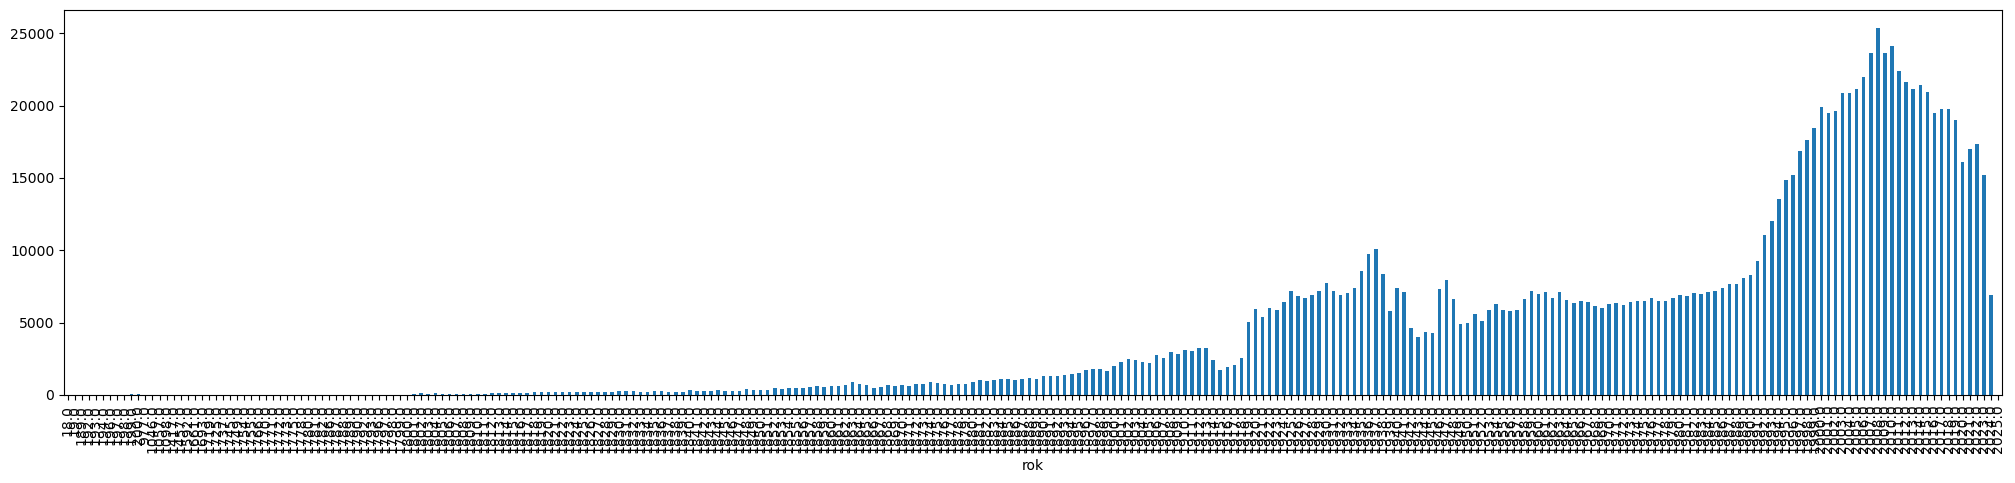

In [15]:
r(df)

In [16]:
df[df['100_a'].astype(str).str.contains('Lednická, Karin',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpz20203232647,200625t20202020xr nnnng f n cze,nim a22 i 4500,1,0,Šikmý kostel /,None,Karin Lednická,None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
nkc20213304795,210129m20202024xr ahf g 000 f cze,nam a22 ia4500,1,0,Šikmý kostel :,románová kronika ztraceného města /,Karin Lednická,None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (437.326), (0:82-3...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
cpz20213379057,211213t20212021xr nnnng f n cze,nim a22 i 4500,1,0,Šikmý kostel.,None,Karin Lednická,"[Druhý díl,]",[Léta 1921-1945 /],None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,"[aut, nrt]",1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
nkc20223403237,220322s2022 xr ach g 000 f cze,nam a22 i 4500,1,0,Životice :,obraz (po)zapomenuté tragédie /,Karin Lednická,None,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 9, 9, 9]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, None, None, None]","[czenas, czenas, czenas, eczenas, eczenas, ecz...",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
nkc20223472496,221116s2022 xr g 000 f eng,nam a22 i 4500,1,4,The leaning church :,chronicle of a town that vanished: 1894-1921 /,Karin Lednická ; English translation: Pavlína ...,None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6)]","[MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,1,[eng],[cze],None,None,None,None,None,None,None,None,None,None,None,NaN,2022.0
cpz20233520279,230512t20232022xr nnnng fz n cze,nim a22 i 4500,1,0,Životice :,obraz (po)zapomenuté tragédie /,Karin Lednická,None,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7, 7]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, fd119452, fd20...","[czenas, czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,"[aut, nrt]",1969-,

In [17]:
df = df[(df["008"].str[15:17] == "xr") & (df["008"].str[35:38] == "cze")]

In [18]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1528, 1901: 1974, poměr: 0.7740628166160081


<Axes: xlabel='rok'>

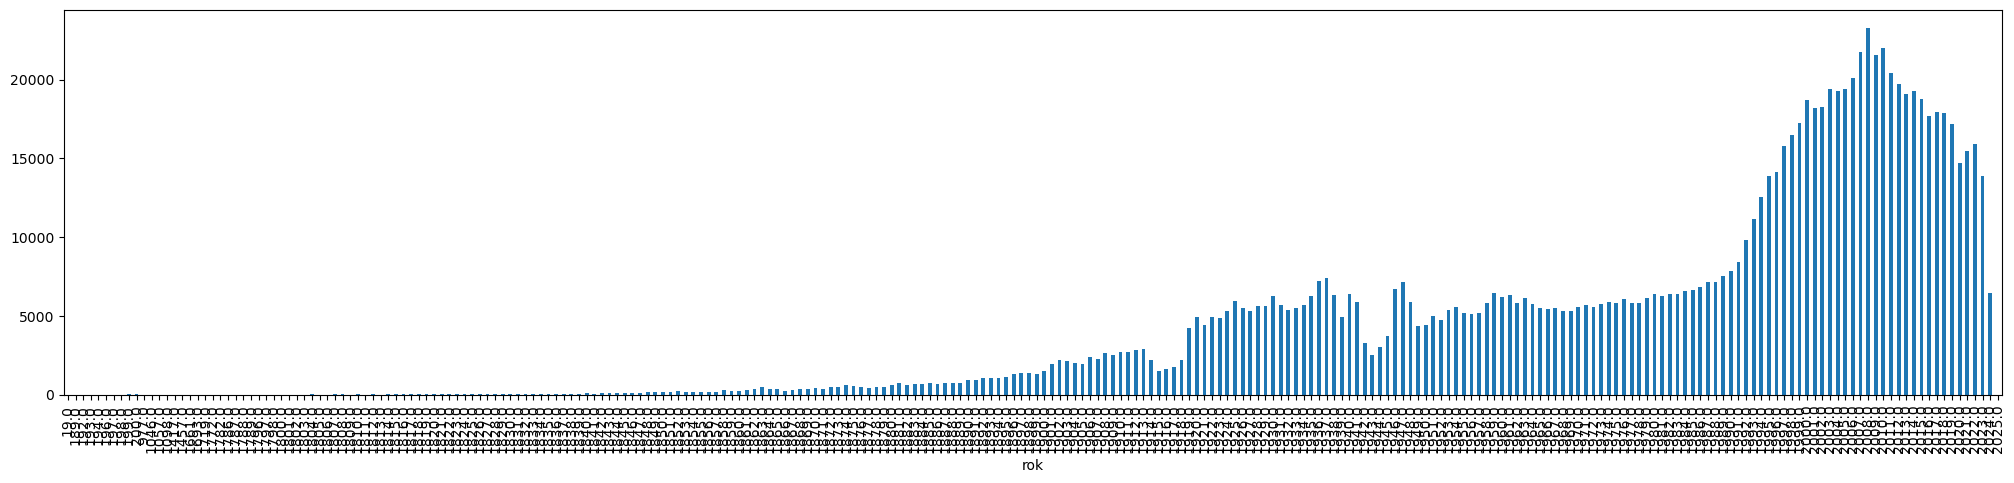

In [19]:
r(df)

In [20]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 1080979 entries, ck8300078 to cpk20243632941
Data columns (total 56 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   008       1080979 non-null  object 
 1   leader    1080979 non-null  object 
 2   245_ind1  1080976 non-null  object 
 3   245_ind2  1080977 non-null  object 
 4   245_a     1080979 non-null  object 
 5   245_b     515211 non-null   object 
 6   245_c     896702 non-null   object 
 7   245_n     65612 non-null    object 
 8   245_p     52724 non-null    object 
 9   245_h     115250 non-null   object 
 10  245_f     16 non-null       object 
 11  245_s     4 non-null        object 
 12  245_v     1 non-null        object 
 13  080_a     898079 non-null   object 
 14  080_2     898079 non-null   object 
 15  080_x     5 non-null        object 
 16  080_9     1 non-null        object 
 17  080_ind1  1 non-null        object 
 18  655_ind2  777138 non-null   object 
 19  655_a     7

In [21]:
df.sample(30)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk193201078,990429s1932 xr cze,nam a22 1 4500,1,0,Rolf :,Román cvičeného psa /,Napsal Ladislav Hájek,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Hájek, Ladislav,",jk01033064,[aut],1884-1943,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932.0
ck8700918,870217s1986 xr e | u000 f cze,nam a22 4500,1,0,Šumavská bílá noc /,None,Petr Pavlík,None,None,None,None,None,None,[821.162.3-31],[MRF],None,None,None,[7],[české romány],[fd133974],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Pavlík, Petr,",jk01092133,[aut],1933-2012,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986.0
bk194604924,980913s1946 xr cze,nam a22 1 4500,1,0,Indiánské pohádky /,None,Bohuslav Čepelák ; ilustroval František Skořepa,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Čepelák, Bohuslav,",jk01021254,[aut],1907-1969,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1946.0
bk192603496,000926s1925 xr ||| | cze,nam a22 1 4500,0,0,Předpis pro traťmistry č. XLI,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.0
bk196104050,980526s1961 xr e 10| 0 cze,nam a22 1 4500,0,0,Sborník 2. ideologicko-metodologické konferenc...,None,None,None,None,None,None,None,None,"[5, (062.534)]","[MRF, MRF]",None,None,None,[7],[sborníky konferencí],[fd133333],[czenas],None,None,None,None,[7],[5],[Přírodní vědy. Matematické vědy],[Konspekt],[6],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Fakulta přírodovědecká University J.E. Purkyn...,1961.0
nkc20102032859,100208s1930 xr g 000 p cze,nam a22 i 4500,1,0,Básně /,None,Karel Hlaváček,None,None,None,None,None,None,"[821.162.3-1, (0:82-1)]","[MRF, MRF]",None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Hlaváček, Karel,",jk01041213,[aut],1874-1898,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1930.0
np9427749,941024s1994 xr b u0|0 0 cze,nam a22 4500,0,0,Alexej Fried :,[Personální bibliogr.],None,None,None,None,None,None,None,"[012, 78, 929]","[undef, undef, undef]",None,None,None,"[7, 7]","[medailony, personální bibliografie]","[fd185951, fd133021]","[czenas, czenas]",None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"[cze, eng]",None,None,None,None,None,None,None,None,None,None,None,None,"[Fried, Alexej (skladatel čes., *1922) - medai...",1994.0
cpk20000981302,010116s2000 xr a e f 001 0 cze,nam a22 a 4500,0,0,Česká biozahrada /,None,Petr Dostálek ... [et al.],None,None,None,None,None,None,"[634/635:631.147, (035)]","[MRF, MRF]",None,None,None,"[7, 9]","[příručky, handbooks and manuals]","[fd133209, None]","[czenas, eczenas]",None,None,None,None,[7],[635],[Zahrádkářství],[Konspekt],[24],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0
nkc20223439659,230427s2022 xr ab e 000 0 cze,nam a22 i 4500,1,0,Moravský Krumlov a okolí nejen z nebe =,Moravský Krumlov and its surroundings not only...,"Radka Fůsková, Radka Srněnská a CBS Flying Tea...",None,None,None,None,None,None,"[778.35, 913(437.322), (437.322), (084.12)]","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 9]","[fotografické publikace, photograp

In [22]:
df[df['100_a'].astype(str).str.contains('Lednická, Karin',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpz20203232647,200625t20202020xr nnnng f n cze,nim a22 i 4500,1,0,Šikmý kostel /,None,Karin Lednická,None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
nkc20213304795,210129m20202024xr ahf g 000 f cze,nam a22 ia4500,1,0,Šikmý kostel :,románová kronika ztraceného města /,Karin Lednická,None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (437.326), (0:82-3...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
cpz20213379057,211213t20212021xr nnnng f n cze,nim a22 i 4500,1,0,Šikmý kostel.,None,Karin Lednická,"[Druhý díl,]",[Léta 1921-1945 /],None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,"[aut, nrt]",1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
nkc20223403237,220322s2022 xr ach g 000 f cze,nam a22 i 4500,1,0,Životice :,obraz (po)zapomenuté tragédie /,Karin Lednická,None,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 9, 9, 9]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, None, None, None]","[czenas, czenas, czenas, eczenas, eczenas, ecz...",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
cpz20233520279,230512t20232022xr nnnng fz n cze,nim a22 i 4500,1,0,Životice :,obraz (po)zapomenuté tragédie /,Karin Lednická,None,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7, 7]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, fd119452, fd20...","[czenas, czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,"[aut, nrt]",1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.0


In [23]:
df = df.explode("leader")

In [24]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1528, 1901: 1974, poměr: 0.7740628166160081


<Axes: xlabel='rok'>

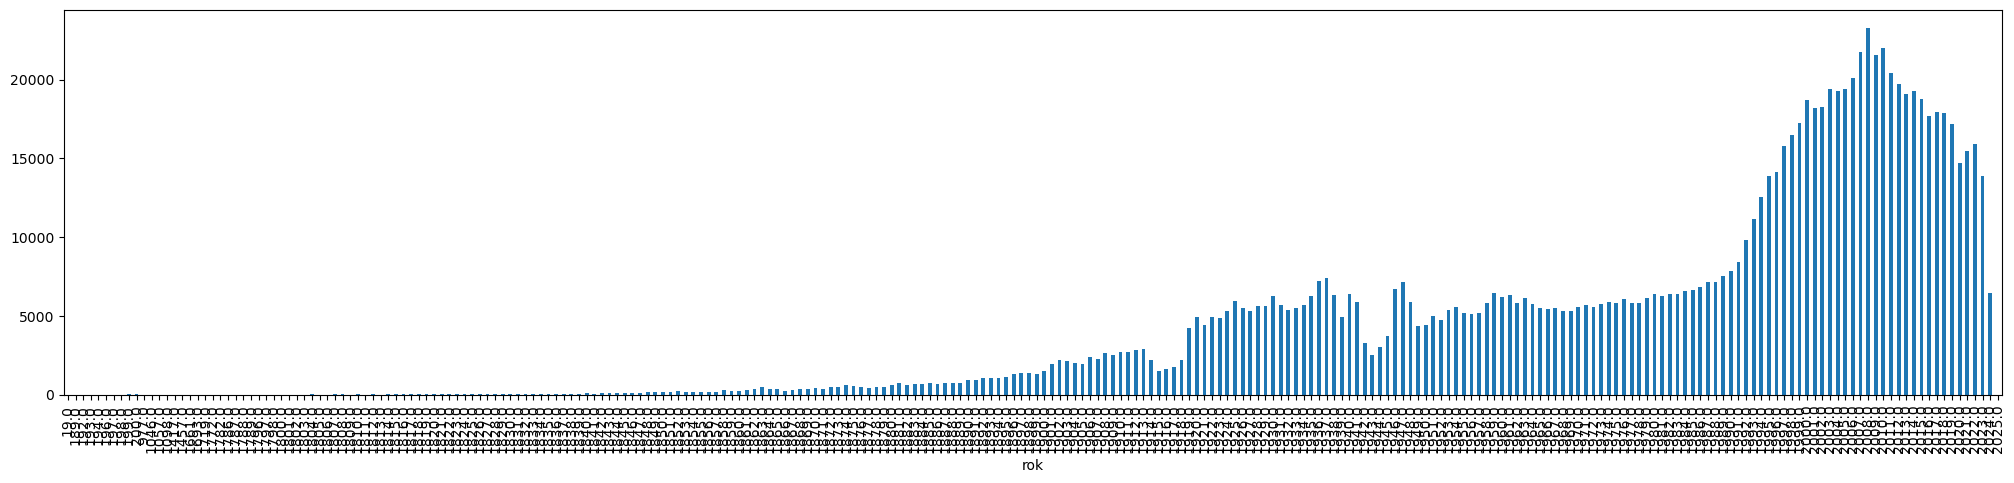

In [25]:
r(df)

In [26]:
df = df[df["leader"].str[6].isin(["a", "t"])]

In [27]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1489, 1901: 1936, poměr: 0.7691115702479339


<Axes: xlabel='rok'>

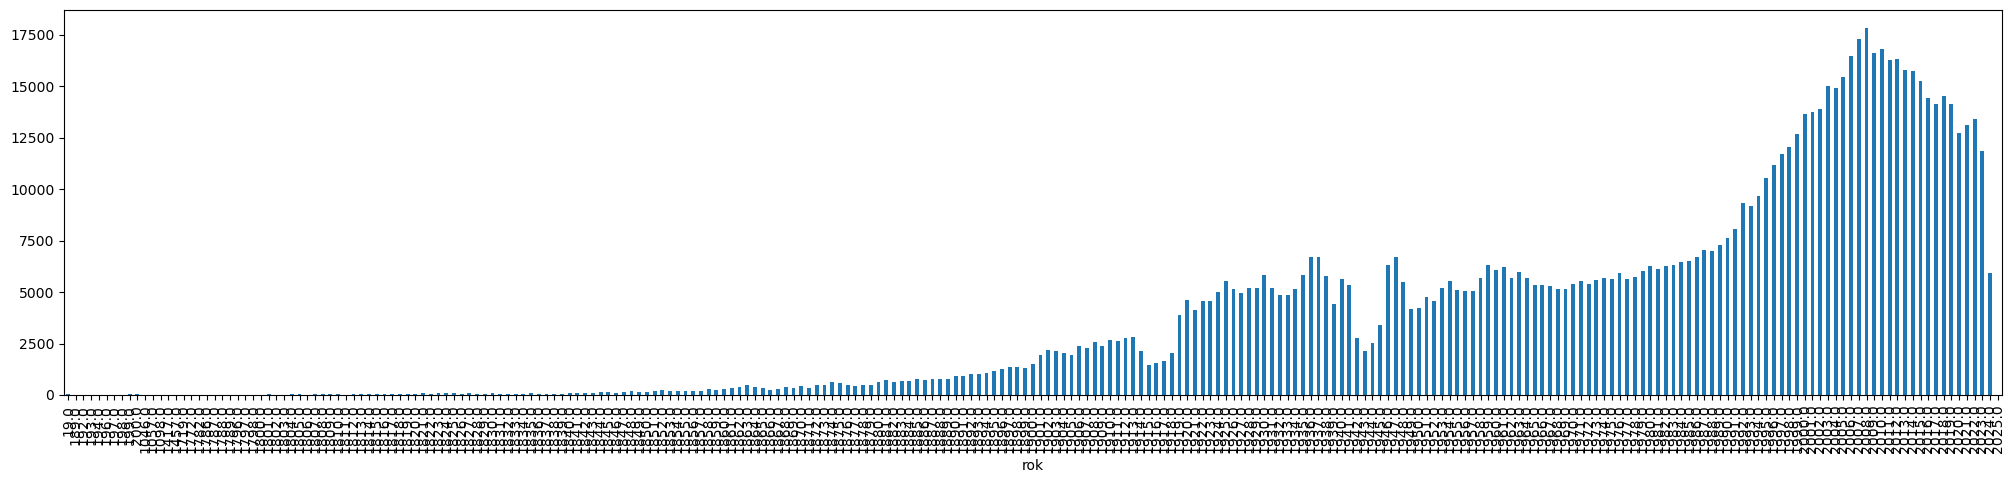

In [28]:
r(df)

In [29]:
df[df['245_a'].astype(str).str.contains('Šikmý kostel',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20213304795,210129m20202024xr ahf g 000 f cze,nam a22 ia4500,1,0,Šikmý kostel :,románová kronika ztraceného města /,Karin Lednická,None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (437.326), (0:82-3...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0


In [30]:
df = df[~df["leader"].str[7].isin(["b", "i", "s", " "])]

In [31]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1377, 1901: 1821, poměr: 0.7561779242174629


<Axes: xlabel='rok'>

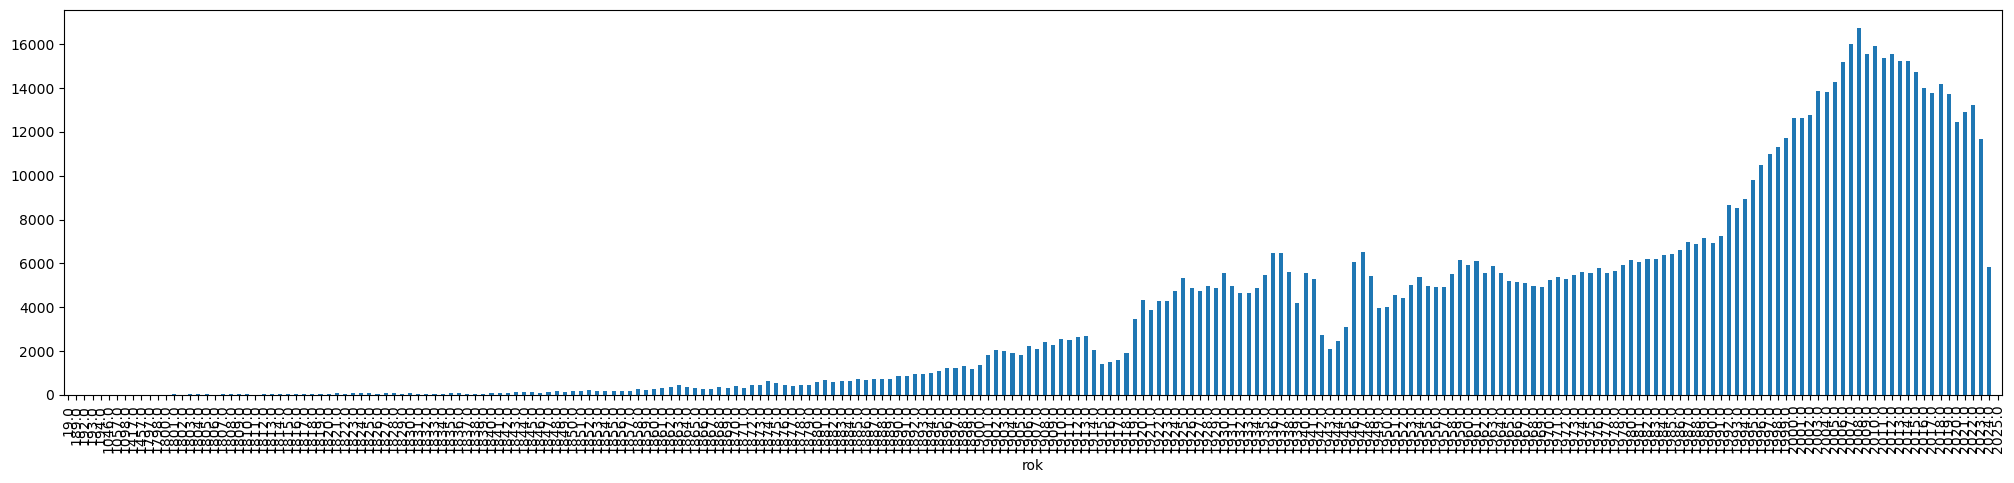

In [32]:
r(df)

In [33]:
df = df.dropna(subset=["rok"])

In [34]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1377, 1901: 1821, poměr: 0.7561779242174629


<Axes: xlabel='rok'>

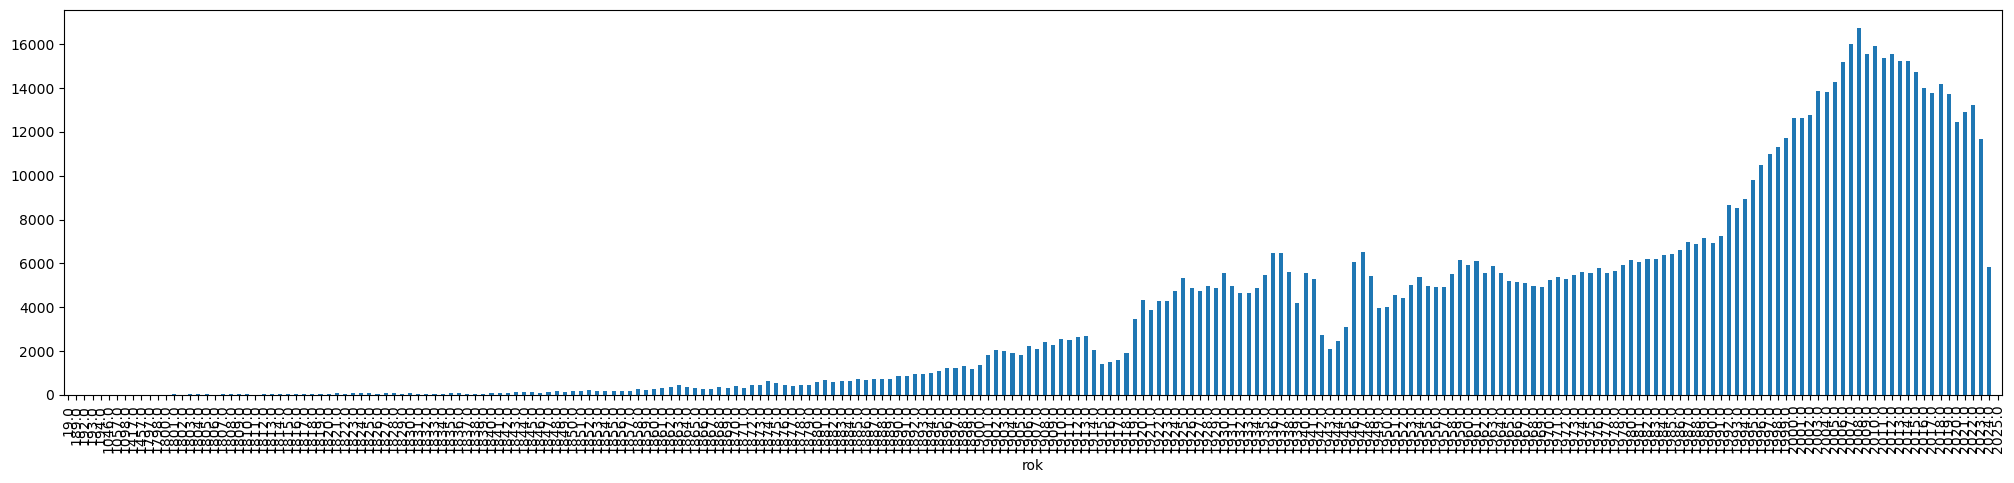

In [35]:
r(df)

In [36]:
df['245_a'].sample(50)

001
nkc20132520040                                    Ve znamení duhy /
nkc20182981013                            Pošlem Anku pro hádanku :
bk192903355                                           Svody tropů :
nos190242211                     Několik poznámek k národní práci /
bk196903506       Informace o knihách pro pracovníky místního ho...
ck8806687                                          Karel Říhovský :
bk196304425                   Proti ztrátám v zahraničním obchodě :
bknhkb02036       Zpráva rady okresního národního výboru v Rumbu...
nkc20061646494                                  Císař - pole mečů /
nkc20081807395    Perspektivní směry nekonvenčních metod technol...
cpk19980536304                                         Síla ticha :
nos190113292                                     Pobřeží tanečnic :
bknmik05200                                           Franz Liszt :
cpk19950112151                                Pokušení lásky 1995 :
nos190252671      Pokusy k vyšetření nejvhod

In [37]:
df.sample(10)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk193903645,990524s1939 xr ||| | cze,nam a22 1 4500,1,0,"Úvod do národního hospodářství, finanční vědy ...",None,napsal František Zeman,"[Část první,]",[Hospodářská a finanční teorie /],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Zeman, František,",uk20191035504,[aut],1881-1957,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1939.0
cpk19950111298,960328s1996 xr a e p 000 0 cze,nam a22 a 4500,1,0,Teorie elektromagnetického pole II :,cvičení /,"Božena Coufalová, Karel Novotný",None,None,None,None,None,None,"[537.8, (075.8)]","[MRF, MRF]",None,None,None,"[7, 9]","[učebnice vysokých škol, textbooks (higher)]","[fd133772, None]","[czenas, eczenas]",None,None,None,None,"[7, 7]","[537.6/.8, 37.016]","[Magnetismus. Elektromagnetismus, Učební osnov...","[Konspekt, Konspekt]","[6, 22]",1,"Coufalová, Božena,",jk01020816,[aut],1932-2009,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.0
cpk20031242715,030610s2002 xr d 000 j cze,cam a22 a 4500,1,0,Zhoubná žeň /,None,H.G. Ewers ; přeložil Jiří Podbrdský,None,None,None,None,None,None,"[821-321.9, (0:82-321.9)]","[MRF, MRF]",None,None,None,"[7, 9]","[vědecko-fantastické povídky, science fiction ...","[fd133845, None]","[czenas, eczenas]",None,None,None,None,[7],[821-31/-34],"[Milostná, dobrodružná, fantastická próza]",[Konspekt],[25],1,"Ewers, H. G.,",ola20010094295,[aut],1930-2013,None,None,None,None,1,[cze],[ger],None,None,None,None,None,None,None,None,None,None,None,NaN,2002.0
ck8905777,891013s1989 xr 001 | cze,cam a22 a 4500,1,0,Čtyři hlasy :,o kompoziční výstavbě poezie pro děti /,František Všetička,None,None,None,None,None,None,"[885.0-1Procházka,F.S., 885.0-1Hrubín,F..081.0...","[undef, undef, undef, undef, undef]",None,None,None,[7],[studie],[fd133597],[czenas],None,None,None,None,[7],[821.162.3.09],[Česká literatura (o ní)],[Konspekt],[11],1,"Všetička, František,",jk01151091,[aut],1932-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Sládek, Josef Václav (básník čes., 1845-1912)...",1989.0
cpk19960138562,960806s1996 xr a e 000 0 cze,nam a22 a 4500,1,0,PC XT + AT.,None,Zdeněk Vrátil,"[20,]",[Postavte si PC /],None,None,None,None,[681.3],[undef],None,None,None,[7],[příručky],[fd133209],[czenas],None,None,None,None,[7],[004.3],[Počítače. Hardware],[Konspekt],[23],1,"Vrátil, Zdeněk",jn20000810262,[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.0
nkc20071713098,070320s2007 xr g 000 f cze,nam a22 a 4500,1,0,"Muž, který si hrál na Boha /",None,Robin Cook ; [přeložila Daniela Klečková],None,None,None,None,None,None,"[821.111(73)-31, (0:82-312.4)]","[MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[americké romány, detektivní romány, American ...","[fd131796, fd132010, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.111(73)-3],[Americká próza],[Konspekt],[25],1,"Cook, Robin,",xx0000523,[aut],1940-,None,None,None,None,1,[cze],[eng],None,None,None,None,None,None,None,None,None,None,None,NaN,2007.0
bk194500177,990111s1945 xr cze,nam a22 1 4500,0,0,Ceník SKF 145 M-3 :,Tento ceník obsahuje ceny samotných litinových...,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1945.0
ck8506716,850515s1984 xr a u0|0 cze,nam a22 4500,1,0,Metodika minivolejbalu pro mládež 9-12 letou /,None,Augustin Tobolka,None,None,None,None,Non

In [38]:
df = df.dropna(subset=['245_a','100_a'])
najdi_zub(df)
df['titul'] = df['245_a'].apply(lambda x: x[:-1].strip() if x[-1] in [':','/',';','=','.'] else x.strip())

Hledám zub mezi lety 1900 a 1901.
1900: 1194, 1901: 1530, poměr: 0.7803921568627451


<Axes: xlabel='rok'>

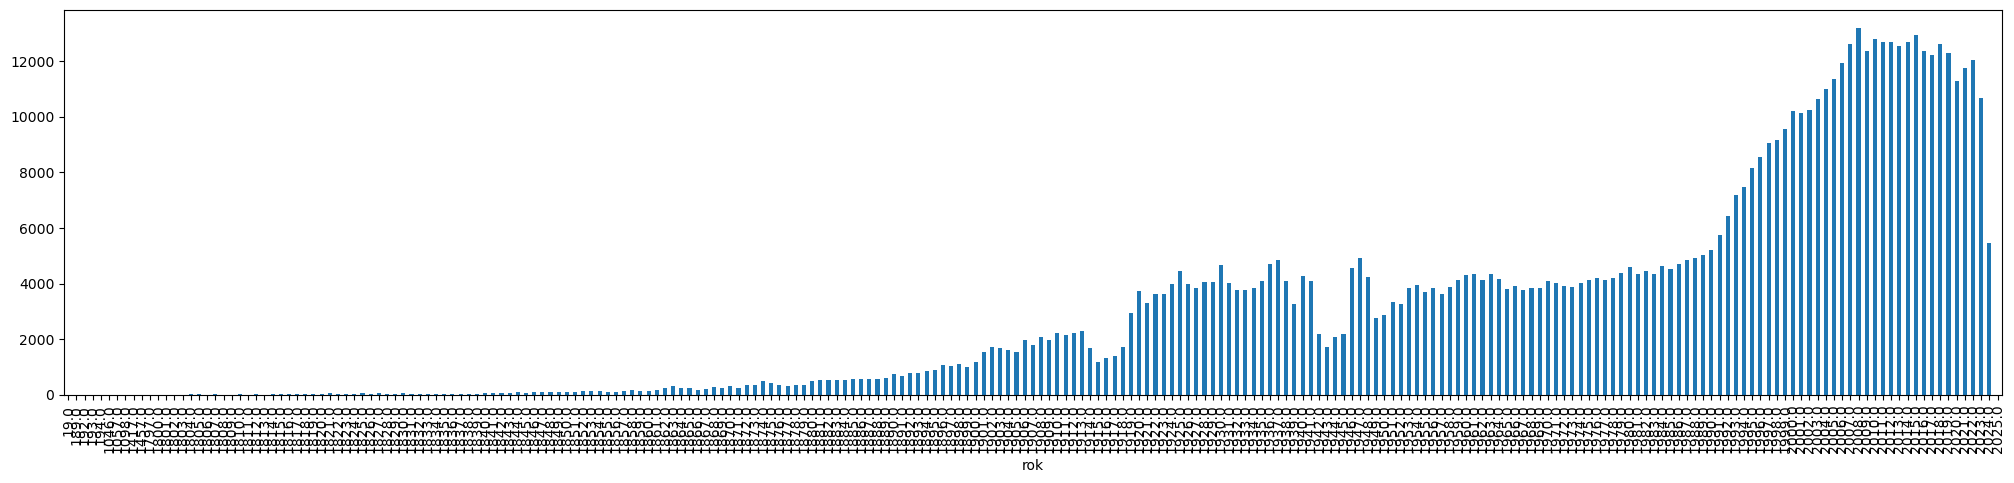

In [39]:
r(df)

## Kontroly divných věcí ze sešitu 112

In [41]:
df[df['245_a'].astype(str).str.contains('Malíř Láďa Rákos')]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## Hledání zubu

In [43]:
najdi_zub(df[df['072_x'].astype(str).str.lower().str.contains('česká próza',na=False)])

Hledám zub mezi lety 1900 a 1901.
1900: 134, 1901: 62, poměr: 2.161290322580645


In [44]:
najdi_zub(df[df['072_a'].astype(str).str.lower().str.contains('821.162.3-3',na=False)])

Hledám zub mezi lety 1900 a 1901.
1900: 134, 1901: 62, poměr: 2.161290322580645


In [45]:
najdi_zub(df[df['080_a'].astype(str).str.contains('821.162.3-3',na=False)])

Hledám zub mezi lety 1900 a 1901.
1900: 131, 1901: 59, poměr: 2.2203389830508473


In [46]:
najdi_zub(df[df['655_a'].astype(str).str.lower().str.contains(r'české (romány|prózy|novely|povídky)', na=False)])

C:\Users\micha\AppData\Local\Temp\ipykernel_3456\3818377305.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  najdi_zub(df[df['655_a'].astype(str).str.lower().str.contains(r'české (romány|prózy|novely|povídky)', na=False)])


Hledám zub mezi lety 1900 a 1901.
1900: 125, 1901: 52, poměr: 2.4038461538461537


In [47]:
najdi_zub(df[(df['080_a'].astype(str).str.contains('885',na=False) & df['080_a'].astype(str).str.contains('82-3',na=False) & ~df['964_a'].astype(str).str.lower().str.contains('hry',na=False) & ~df['072_x'].astype(str).str.lower().str.contains('české drama',na=False))])

Hledám zub mezi lety 1900 a 1901.
division by zero


In [48]:
najdi_zub(df[df['080_a'].astype(str).str.contains('885-321.')])

Hledám zub mezi lety 1900 a 1901.
division by zero


In [49]:
najdi_zub(df[df['080_a'].astype(str).str.contains('885.0-31',na=False)])

Hledám zub mezi lety 1900 a 1901.
1900: 1, 1901: 1, poměr: 1.0


In [50]:
najdi_zub(df[((df['008'].str[33] == '1') & (df['041_h'].isnull()))])

Hledám zub mezi lety 1900 a 1901.
1900: 69, 1901: 36, poměr: 1.9166666666666667


## Finální export

In [52]:
najdi_zub(df)
ceska_proza = df[
    df['072_x'].astype(str).str.lower().str.contains('česká próza',na=False)
    | df['072_a'].astype(str).str.lower().str.contains('821.162.3-3',na=False)
    | df['080_a'].astype(str).str.contains('821.162.3-3',na=False)
    | df['655_a'].astype(str).str.lower().str.contains(r'české (romány|prózy|novely|povídky)', na=False)
    | (df['080_a'].astype(str).str.contains('885',na=False) & df['080_a'].astype(str).str.contains('82-3',na=False) & ~df['964_a'].astype(str).str.lower().str.contains('hry',na=False) & ~df['072_x'].astype(str).str.lower().str.contains('české drama',na=False))
    | df['080_a'].astype(str).str.contains('885-321.')
    | df['080_a'].astype(str).str.contains('885.0-31',na=False)
    | ((df['008'].str[33] == '1') & (df['041_h'].isnull()))
]
najdi_zub(ceska_proza)
ceska_proza = ceska_proza[ceska_proza['100_a'].notnull()]
najdi_zub(ceska_proza)
ceska_proza['autorstvo'] = ceska_proza['100_a'].apply(lambda x: x.replace(',','').strip() if x != None else None)
ceska_proza['autorstvo_kod'] = ceska_proza['100_7']
ceska_proza2 = ceska_proza.sort_values(by='rok').drop_duplicates(subset=['titul','autorstvo'], keep='first')

Hledám zub mezi lety 1900 a 1901.
1900: 1194, 1901: 1530, poměr: 0.7803921568627451


C:\Users\micha\AppData\Local\Temp\ipykernel_3456\1426422352.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  | df['655_a'].astype(str).str.lower().str.contains(r'české (romány|prózy|novely|povídky)', na=False)


Hledám zub mezi lety 1900 a 1901.
1900: 187, 1901: 83, poměr: 2.253012048192771
Hledám zub mezi lety 1900 a 1901.
1900: 187, 1901: 83, poměr: 2.253012048192771


In [53]:
ceska_proza2[['rok','titul','autorstvo','autorstvo_kod']].sample(20)

,rok,titul,autorstvo,autorstvo_kod
001,,,,
nkc20182987257,2018.0,Čertí babička,Gecková Iva,ola2018982229
np9432344,1916.0,Romance štědrovečerní,Neruda Jan,jk01083209
nkc20102087173,2010.0,"Pošuk je, ale nádhernej",Kasalová Jitka,ola2010613435
nkc20172881143,2017.0,Koza Líza a její kamarádi,Peisertová Alena,jn20001005453
bk194803397,1948.0,Jezero plameňáků,Pašek Mirko,jk01091848
nkc20112161737,2010.0,Pod ochranou královny,Bahounek Jiří,jn19981000188
nkc20122390606,2012.0,Koník,Barone Gianluca,xx0159083
cpk20193101728,1975.0,Emír má zelenou a čtyři další obrázkové příběhy,Štíplová Ljuba,jk01131441
nkc20142624747,2014.0,Veliká novina o hrozném mordu Šimona Abelese,Toman Marek,js20020204004


<Axes: xlabel='rok'>

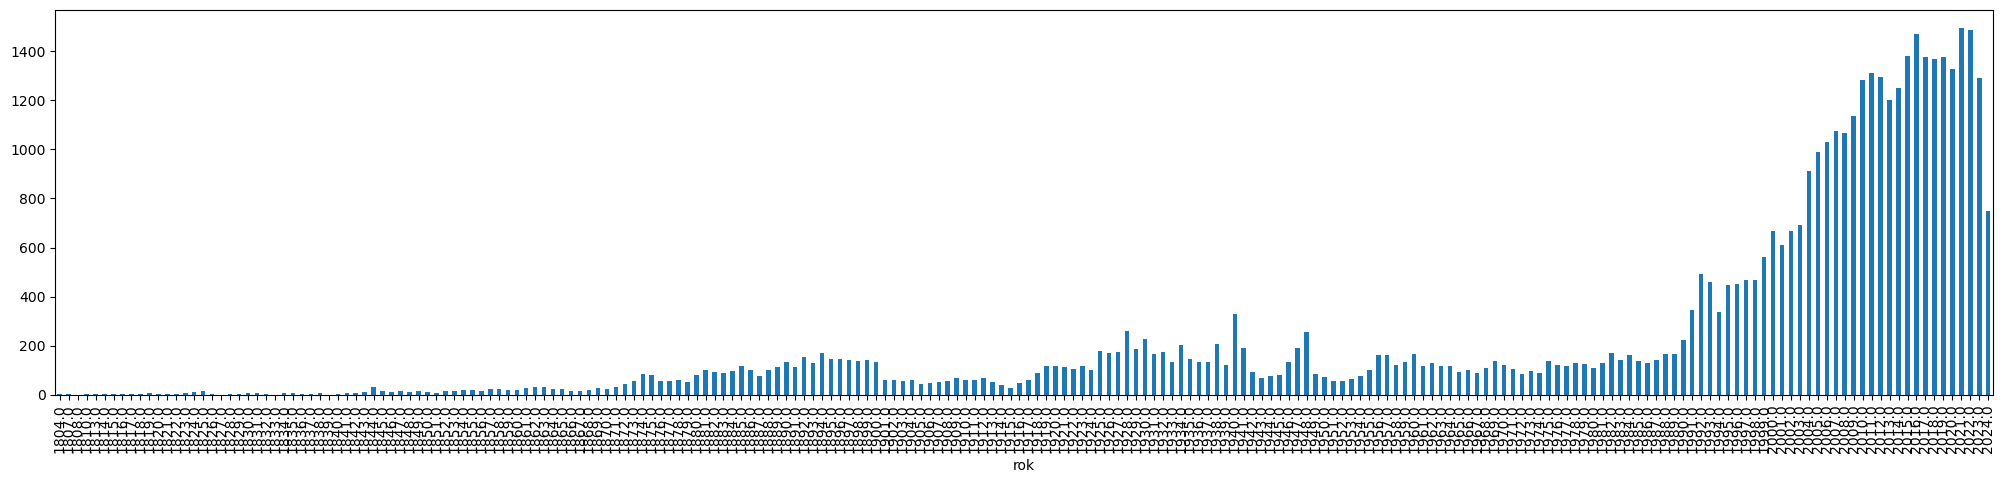

In [54]:
r(ceska_proza2)

In [55]:
ceska_proza2[ceska_proza2['rok'] == 1890].sample(20)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok,titul,autorstvo,autorstvo_kod
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20000973697,001109s1890 xr g 000 j cze,nam a22 a 4500,1,0,Naše vesnice po roce 1860 :,"sbírka obrázků a povídek, jež lidu českému sep...",None,None,None,None,None,None,None,"[821.162.3-32, (0:82-32)]","[MRF, MRF]",None,None,None,[7],[české povídky],[fd133971],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Brynych, Edvard Jan Nepomucký,",jk01013358,[aut],1846-1902,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Naše vesnice po roce 1860,Brynych Edvard Jan Nepomucký,jk01013358
bknkst04930,020420s1890 xr f ||| 0 cze,nam a22 1 4500,1,0,Hvězda z Vícemilic :,Román /,od Vácslava Vlčka,None,None,None,None,None,None,"[821.162.3-31, (0:82-31)]","[MRF, MRF]",None,None,None,[7],[české romány],[fd133974],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Vlček, Václav,",jk01150131,[aut],1839-1908,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Hvězda z Vícemilic,Vlček Václav,jk01150131
nkc20092025972,091215s1890 xr e 000 j cze,nam a22 a 4500,1,0,"Husitské obrázky, čili, K čemu musí ubohý Hus ...",None,napsal Bohumil Brodský,None,None,None,None,None,None,"[821.162.3-32, (0:82-32)]","[MRF, MRF]",None,None,None,[7],[české povídky],[fd133971],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Zahradník-Brodský, Bohumil,",jk01151969,[aut],1862-1939,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,"Husitské obrázky, čili, K čemu musí ubohý Hus ...",Zahradník-Brodský Bohumil,jk01151969
np9429218,950206s1890 xr a g 000 f cze,nam a22 i 4500,1,0,Za bouře i klidu :,dva historické obrazy,None,None,None,None,None,None,None,"[821.162.3-3, (0:82-321.6)]","[MRF, MRF]",None,None,None,"[7, 7]","[české prózy, historické prózy]","[fd133972, fd338442]","[czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Jirásek, Alois,",jk01051816,[aut],1851-1930,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Za bouře i klidu,Jirásek Alois,jk01051816
bkn20010991477,010302s1890 xr a e 000 j cze,nam a22 a 4500,1,0,Zašlými věky /,None,obrázky historické od Josefa Brauna,None,None,None,None,None,None,"[821.162.3-32, (0:82-321.6)]","[MRF, MRF]",None,None,None,"[7, 7]","[české povídky, historické povídky]","[fd133971, fd132412]","[czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Braun, Josef,",jk01013012,[aut],1864-1891,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Zašlými věky,Braun Josef,jk01013012
nkc20091858746,090225s1890 xr a j 000 1 cze,nam a22 a 4500,1,0,Kolébka lidstva :,obrázky z Asie /,ze spisů Fr. Hellwalda a jiných pro mládež vyb...,None,None,None,None,None,None,"[821-93, 908(5), (0:82-992)]","[MRF, MRF, MRF]",None,None,None,"[7, 7]","[publikace pro mládež, cestopisy]","[fd133157, fd131956]","[czenas, czenas]",None,None,None,None,"[7, 7]","[913(5), 0/9-053.2]","[Geografie Asie, reálie, cestování, Literatura...","[Konspekt, Konspekt]","[7, 26]",1,"Hrnčíř, František,",jk01042782,[aut],1860-1928,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Kolébka lidstva,Hrnčíř František,jk01042782
cpk20021189314,021016s1890 xr e 000 j cze,nam a22 a 4500,1,0,Hlasatelé svobody :,tři obrázky z naší doby /,napsal Bohumil Brodský,None,None,None,None,None,None,"[821.162.3-32, (0:82-32)]","[MRF, MRF]",None,None,None,[7],[české povídky],[fd133971],

In [56]:
len(ceska_proza2)

47195

In [57]:
ceska_proza2.sample(20)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok,titul,autorstvo,autorstvo_kod
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20112253103,111121s2011 xr a b 000 f cze,nam a22 a 4500,1,0,Nebezpečná přímluva ;,O dvou obrech /,Miloš Kratochvíl ; ilustrace Markéta Vydrová,None,None,None,None,None,None,"[821-93, 821.162.3-34, (0:82-34)]","[MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české pohádky, publikace pro děti, Czech fair...","[fd133970, fd133156, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,"[7, 7]","[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[Konspekt, Konspekt]","[25, 26]",1,"Kratochvíl, Miloš,",jk01062996,[aut],1948-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,Nebezpečná přímluva,Kratochvíl Miloš,jk01062996
cpk19970209064,970716s1980 xr a g 000 j cze,nam a22 a 4500,1,0,Start do neznáma /,None,Jiří Marold,None,None,None,None,None,None,"[821.162.3-32, (0:82-322.4)]","[MRF, MRF]",None,None,None,"[7, 7]","[české příběhy, detektivní příběhy]","[fd133973, fd132009]","[czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Marold, Jiří",xx0067916,[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980.0,Start do neznáma,Marold Jiří,xx0067916
nkc20233580035,240125s2024 xr a g 000 f cze,nam a22 i 4500,1,0,Na hraně apokalypsy /,None,Aleš Černý,None,None,None,None,None,None,"[821.162.3-31, (0:82-311.9)]","[MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, vědecko-fantastické romány, Cze...","[fd133974, fd133847, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Černý, Aleš,",xx0313205,"[aut, ill]",1988-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Na hraně apokalypsy,Černý Aleš,xx0313205
bknjaj11255,021120s1934 xr e 000 1 cze,nam a22 1 4500,1,0,Rodina 1933.,komedie o třech dějstvích /,Jiří Mahen,"[[I.],]",[O maminku :],None,None,None,None,"[821.162.3-2, (0:82-2)]","[MRF, MRF]",None,None,None,[7],[česká dramata],[fd133957],[czenas],None,None,None,None,[7],[821.162.3-2],[České drama],[Konspekt],[25],1,"Mahen, Jiří,",jk01072867,[aut],1882-1939,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1934.0,Rodina 1933,Mahen Jiří,jk01072867
nkc20102145866,101027s2010 xr a b 000 f cze,nam a22 a 4500,1,0,Bílá paní na hlídání /,None,Pavel Brycz ; ilustrovala Eva Sýkorová-Pekárková,None,None,None,None,None,None,"[821-93, 821.162.3-32, (0:82-32)]","[MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české příběhy, publikace pro děti, Czech stor...","[fd133973, fd133156, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,"[7, 7]","[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[Konspekt, Konspekt]","[25, 26]",1,"Brycz, Pavel,",jn20000400291,[aut],1968-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,Bílá paní na hlídání,Brycz Pavel,jn20000400291
nkc20233548915,230919s2023 xr c 000 f cze,nam a22 i 4500,1,0,Elixír neviditelnosti /,None,Marie Bláhová,None,None,None,None,None,None,"[821.162.3-31, 821-93, (0:82-31)]","[MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, publikace pro mládež, Czech fic...","[fd133974, fd133157, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,"[7, 7]","[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[Konspekt, Konspekt]","[25, 26]",1,"Bláhová, Marie,",xx0307300,[aut],1963-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [58]:
ceska_proza2[ceska_proza2['autorstvo'] == 'Němcová Božena']

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok,titul,autorstvo,autorstvo_kod
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20122433977,121221m18451848xr g 000 f cze,nam a22 ia4500,1,0,Národní báchorky a powěsti /,None,od Boženy Němcowé,None,None,None,None,None,None,"[821.162.3-34, (0:82-34)]","[MRF, MRF]",None,None,None,[7],[české pohádky],[fd133970],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1845.0,Národní báchorky a powěsti,Němcová Božena,jk01083016
cpk20223420309,220509m18541855xr g 000 f cze,nam a22 ia4500,1,0,Národní Báchorky a Pověsti od Boženy Němcové,None,None,None,None,None,None,None,None,"[821.162.3-34, (0:82-34)]","[MRF, MRF]",None,None,None,"[7, 7]","[české pověsti, české pohádky]","[fd201456, fd133970]","[czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1854.0,Národní Báchorky a Pověsti od Boženy Němcové,Němcová Božena,jk01083016
bknhak08992,030516s1855 xr e 000 f cze,nam a22 a 4500,1,0,Babička :,obrazy venkovského života /,od Boženy Němcové,None,None,None,None,None,None,"[821.162.3-3, (0:82-3)]","[MRF, MRF]",None,None,None,"[7, 9]","[české prózy, Czech prose]","[fd133972, None]","[czenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1855.0,Babička,Němcová Božena,jk01083016
cpk20132502523,131002s1856 xr 000 1 cze,nam a22 aa4500,1,0,Pohorská vesnice :,povídka ze života lidu venkovského /,od Boženy Němcové,None,None,None,None,None,None,"[821.162.3-3, (0:82-3)]","[MRF, MRF]",None,None,None,"[7, 9]","[české prózy, Czech prose]","[fd133972, None]","[czenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1856.0,Pohorská vesnice,Němcová Božena,jk01083016
bknhak09084,030517m18571858xr e 000 1 cze,nam a22 1 4500,1,0,Slovenské pohádky a pověsti.,None,od Boženy Němcové,[Sv. I-X /],None,None,None,None,None,"[821.162.4-34, (0:82-34)]","[MRF, MRF]",None,None,None,"[7, 7]","[slovenské pohádky, slovenské pověsti]","[fd133448, fd219004]","[czenas, czenas]",None,None,None,None,[7],[821.162.4],[Slovenská literatura],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1857.0,Slovenské pohádky a pověsti,Němcová Božena,jk01083016
nkc20061643751,060220s1862 xr g 000 m cze,nam a22 a 4500,1,0,Chýže pod horami :,obrázek ze Slovenska ; O dvanácti měsíčkách : ...,od Boženy Němcové,None,None,None,None,None,None,"[821.162.3-32, 821.162.4-34]","[MRF, MRF]",None,None,None,"[7, 7]","[české povídky, slovenské pohádky]","[fd133971, fd133448]","[czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1862.0,Chýže pod horami,Němcová Božena,jk01083016
cpk20132447922,130320s1862 xr e 000 j cze,nam a22 aa4500,1,0,Drobné povídky /,None,od Boženy Němcové,None,None,None,None,None,None,[821.162.3-32],[MRF],None,None,None,[7],[české povídky],[fd133971],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Němcová, Božena,",jk01

In [59]:
ceska_proza2[['rok','titul','autorstvo','autorstvo_kod']].to_json(os.path.join("data","cnb_ceska_proza.json"), orient="index", indent=4)
ceska_proza2[['rok','titul','autorstvo','autorstvo_kod']].to_parquet(os.path.join("data","cnb_ceska_proza.parquet"))

In [60]:
ceska_proza2[ceska_proza2['rok'] == 2024].sort_values(by='008', key=lambda x: x.str[:6], ascending=False)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok,titul,autorstvo,autorstvo_kod
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20243632920,240923s2024 xr a 000 1 cze,nam a22 i 4500,1,0,Moje obří strašilka /,None,napsala Jana Burešová ; ilustroval Jakub Dvořák,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Burešová, Jana",xx0223719,[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Moje obří strašilka,Burešová Jana,xx0223719
nkc20243632045,240923s2024 xr g 000 f cze,nam a22 i 4500,1,0,Ve výslužbě.,None,Martin Goffa,None,"[Zmizelá, aneb, První poslední případ /]",None,None,None,None,"[821.162.3-31, (0:82-312.4)]","[MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, detektivní romány, Czech fictio...","[fd133974, fd132010, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Goffa, Martin,",xx0165664,[aut],1973-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Ve výslužbě,Goffa Martin,xx0165664
nkc20243632885,240923s2024 xr g 000 f cze,nam a22 i 4500,1,0,Dvojsmyslná /,None,Irová Marie,None,None,None,None,None,None,"[821.162.3-31, (0:82-31)-055.2]","[MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, romány pro ženy, Czech fiction,...","[fd133974, fd187897, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Irová, Marie",xx0323069,[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Dvojsmyslná,Irová Marie,xx0323069
nkc20243632055,240923s2024 xr a 000 1 cze,nam a22 i 4500,1,0,Lišákova dobrodružství /,None,Iva Tomečková ; ilustrovala Tereza Křemínská,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Tomečková, Iva,",mzk2005318189,[aut],1958-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Lišákova dobrodružství,Tomečková Iva,mzk2005318189
nkc20243606272,240919s2024 xr 000 1 cze,nam a22 i 4500,1,0,Obyčejná laskavost ;,Neobyčejná nestoudnost /,Michal Viewegh,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Viewegh, Michal,",jn19990010021,[aut],1962-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Obyčejná laskavost,Viewegh Michal,jn19990010021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20233550172,230929s2024 xr g 000 j cze,nam a22 i 4500,1,0,Moderní gigolo /,None,Eloise,None,None,None,None,None,None,"[821.162.3-32, (0:82-321.5)]","[MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české příběhy, humoristické příběhy, Czech st...","[fd133973, fd132430, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],0,"Eloise,",xx0321951,[aut],1972-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Moderní gigolo,Eloise,xx0321951
nkc20233548538,230918s2024 xr a b 000 j cze,nam a22 i 4500,1,0,Skřítkové z Adršpašských skal /,None,Klára Končáková ; ilustrace Lucie Gajdošová,None,None,None,None,None,None,"[821.162.3-32, 821-93, (437.31-17), (0:82-32)]","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české příběhy, publikace pro děti, Czech stor...","[fd133973, fd133156, None, None]","[czenas, czenas, eczenas, ecz